In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Give dataset path
train_path = '/content/drive/My Drive/Colab Notebooks/em_de/emotion_detection/train'
validate_path='/content/drive/My Drive/Colab Notebooks/em_de/emotion_detection/test'

Working with 4005 images
Image examples: 
im3102.png


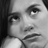

im669.png


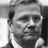

im3711.png


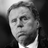

im3543.png


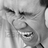

im3204.png


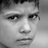

In [5]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object 
folder = train_path+'/angry'
onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")
for i in range(5):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [7]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/drive/My Drive/Colab Notebooks/em_de/emotion_detection/train/*')
print(len(folders))

7


In [10]:
from tensorflow.keras import layers, models
x = Flatten()(vgg.output)
prediction =Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from keras import optimizers
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/em_de/emotion_detection/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 28799 images belonging to 7 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/em_de/emotion_detection/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7194 images belonging to 7 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint(filepath='mymodel.h5', verbose=1, save_best_only=True)
# callbacks = [checkpoint]
start = datetime.now()

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model_history=model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set)/32,
  validation_steps=len(test_set)/32,
  callbacks=[checkpoint,early],
  verbose=1)

<ipython-input-24-7e4d0aff40d3>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/100
29/28 [==============================] - ETA: -9s - loss: 1.6004 - accuracy: 0.3901

28/28 [==============================] - 337s 12s/step - loss: 1.6004 - accuracy: 0.3901 - val_loss: 1.6103 - val_accuracy: 0.4277
Epoch 2/100
29/28 [==============================] - ETA: -9s - loss: 1.6696 - accuracy: 0.3922

28/28 [==============================] - 310s 11s/step - loss: 1.6696 - accuracy: 0.3922 - val_loss: 2.0812 - val_accuracy: 0.3154
Epoch 3/100
29/28 [==============================] - ETA: -9s - loss: 1.6471 - accuracy: 0.4203

28/28 [==============================] - 321s 11s/step - loss: 1.6471 - accuracy: 0.4203 - val_loss: 1.3934 - val_accuracy: 0.4863
Epoch 4/100
29/28 [==============================] - ETA: -8s - loss: 1.4892 - accuracy: 0.4688

28/28 [==============================] - 287s 10s/step - loss: 1.4892 - accuracy: 0.4688 - val_loss: 1.4849 - val_accuracy: 0.4746
Epoch 5/100
29/28 [==============================] - ETA: -8s - loss: 1.4265 - accuracy: 0.4677

28/28 [==============================] - 270s 10s/step - loss: 1.4265 - accuracy: 0.4677 - val_loss: 1.4787 - val_accuracy: 0.4697
Epoch 6/100
29/28 [==============================] - ETA: -8s - loss: 1.4218 - accuracy: 0.4688

28/28 [==============================] - 282s 10s/step - loss: 1.4218 - accuracy: 0.4688 - val_loss: 1.5133 - val_accuracy: 0.4043
Epoch 7/100
29/28 [==============================] - ETA: -7s - loss: 1.5919 - accuracy: 0.4159

28/28 [==============================] - 264s 9s/step - loss: 1.5919 - accuracy: 0.4159 - val_loss: 1.6778 - val_accuracy: 0.4033
Epoch 8/100
29/28 [==============================] - ETA: -8s - loss: 1.5799 - accuracy: 0.4095

28/28 [==============================] - 271s 10s/step - loss: 1.5799 - accuracy: 0.4095 - val_loss: 1.6060 - val_accuracy: 0.4092
Epoch 9/100
29/28 [==============================] - ETA: -7s - loss: 1.4200 - accuracy: 0.4881

28/28 [==============================] - 254s 9s/step - loss: 1.4200 - accuracy: 0.4881 - val_loss: 1.4157 - val_accuracy: 0.4941
Epoch 10/100
29/28 [==============================] - ETA: -7s - loss: 1.3906 - accuracy: 0.4795

28/28 [==============================] - 239s 9s/step - loss: 1.3906 - accuracy: 0.4795 - val_loss: 1.4369 - val_accuracy: 0.4775
Epoch 11/100
29/28 [==============================] - ETA: -6s - loss: 1.4483 - accuracy: 0.4677

28/28 [==============================] - 229s 8s/step - loss: 1.4483 - accuracy: 0.4677 - val_loss: 1.7193 - val_accuracy: 0.4297
Epoch 12/100
29/28 [==============================] - ETA: -6s - loss: 1.4807 - accuracy: 0.4634

28/28 [==============================] - 220s 8s/step - loss: 1.4807 - accuracy: 0.4634 - val_loss: 1.4980 - val_accuracy: 0.4883
Epoch 13/100
29/28 [==============================] - ETA: -6s - loss: 1.4045 - accuracy: 0.4849

28/28 [==============================] - 215s 8s/step - loss: 1.4045 - accuracy: 0.4849 - val_loss: 1.5488 - val_accuracy: 0.4570
Epoch 14/100
29/28 [==============================] - ETA: -6s - loss: 1.4840 - accuracy: 0.4860

28/28 [==============================] - 221s 8s/step - loss: 1.4840 - accuracy: 0.4860 - val_loss: 1.4501 - val_accuracy: 0.4688
Epoch 15/100
29/28 [==============================] - ETA: -6s - loss: 1.4517 - accuracy: 0.4720

28/28 [==============================] - 210s 7s/step - loss: 1.4517 - accuracy: 0.4720 - val_loss: 1.3624 - val_accuracy: 0.5010
Epoch 16/100
29/28 [==============================] - ETA: -6s - loss: 1.4052 - accuracy: 0.4881

28/28 [==============================] - 204s 7s/step - loss: 1.4052 - accuracy: 0.4881 - val_loss: 1.4669 - val_accuracy: 0.4531
Epoch 17/100
29/28 [==============================] - ETA: -5s - loss: 1.4858 - accuracy: 0.4461

28/28 [==============================] - 193s 7s/step - loss: 1.4858 - accuracy: 0.4461 - val_loss: 1.5522 - val_accuracy: 0.4297
Epoch 18/100
29/28 [==============================] - ETA: -5s - loss: 1.4328 - accuracy: 0.4720

28/28 [==============================] - 195s 7s/step - loss: 1.4328 - accuracy: 0.4720 - val_loss: 1.4195 - val_accuracy: 0.4717
Epoch 19/100
29/28 [==============================] - ETA: -5s - loss: 1.4320 - accuracy: 0.4795

28/28 [==============================] - 174s 6s/step - loss: 1.4320 - accuracy: 0.4795 - val_loss: 1.3326 - val_accuracy: 0.5244
Epoch 20/100
29/28 [==============================] - ETA: -5s - loss: 1.3557 - accuracy: 0.5119

28/28 [==============================] - 180s 6s/step - loss: 1.3557 - accuracy: 0.5119 - val_loss: 1.5121 - val_accuracy: 0.4297
Epoch 21/100
29/28 [==============================] - ETA: -5s - loss: 1.3770 - accuracy: 0.4838

28/28 [==============================] - 181s 6s/step - loss: 1.3770 - accuracy: 0.4838 - val_loss: 1.4065 - val_accuracy: 0.4854
Epoch 22/100
29/28 [==============================] - ETA: -5s - loss: 1.3795 - accuracy: 0.4849

28/28 [==============================] - 176s 6s/step - loss: 1.3795 - accuracy: 0.4849 - val_loss: 1.5109 - val_accuracy: 0.4307
Epoch 23/100
29/28 [==============================] - ETA: -5s - loss: 1.5285 - accuracy: 0.4526

28/28 [==============================] - 175s 6s/step - loss: 1.5285 - accuracy: 0.4526 - val_loss: 1.4074 - val_accuracy: 0.4717
Epoch 24/100
29/28 [==============================] - ETA: -4s - loss: 1.4035 - accuracy: 0.4731

28/28 [==============================] - 156s 6s/step - loss: 1.4035 - accuracy: 0.4731 - val_loss: 1.5084 - val_accuracy: 0.4785
Epoch 25/100
29/28 [==============================] - ETA: -4s - loss: 1.5780 - accuracy: 0.4752

28/28 [==============================] - 152s 5s/step - loss: 1.5780 - accuracy: 0.4752 - val_loss: 1.7475 - val_accuracy: 0.4219
Epoch 26/100
29/28 [==============================] - ETA: -4s - loss: 1.4825 - accuracy: 0.4709

28/28 [==============================] - 155s 6s/step - loss: 1.4825 - accuracy: 0.4709 - val_loss: 1.3163 - val_accuracy: 0.5244
Epoch 27/100
29/28 [==============================] - ETA: -4s - loss: 1.3868 - accuracy: 0.4903

28/28 [==============================] - 150s 5s/step - loss: 1.3868 - accuracy: 0.4903 - val_loss: 1.3208 - val_accuracy: 0.5205
Epoch 28/100
29/28 [==============================] - ETA: -4s - loss: 1.4279 - accuracy: 0.4838

28/28 [==============================] - 144s 5s/step - loss: 1.4279 - accuracy: 0.4838 - val_loss: 1.7313 - val_accuracy: 0.4414


In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set)/32,
  validation_steps=len(test_set)/32
)

<ipython-input-17-772127a97c78>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/2
28/28 [==============================] - 559s 20s/step - loss: 2.2288 - accuracy: 0.2284 - val_loss: 1.8747 - val_accuracy: 0.3281
Epoch 2/2
28/28 [==============================] - 536s 19s/step - loss: 1.7491 - accuracy: 0.3168 - val_loss: 1.7855 - val_accuracy: 0.3164


In [22]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint(filepath='mymodel.h5', verbose=1, save_best_only=True)
# callbacks = [checkpoint]
start = datetime.now()

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model_history=model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=[checkpoint,early],
  verbose=1)

<ipython-input-22-e640200b4647>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 1.7025 - accuracy: 0.3000 

5/5 [==============================] - 399s 96s/step - loss: 1.7025 - accuracy: 0.3000 - val_loss: 1.8806 - val_accuracy: 0.3447
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 1.7606 - accuracy: 0.3938 

5/5 [==============================] - 343s 83s/step - loss: 1.7606 - accuracy: 0.3938 - val_loss: 1.6634 - val_accuracy: 0.4004
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 1.7776 - accuracy: 0.3875 

5/5 [==============================] - 289s 69s/step - loss: 1.7776 - accuracy: 0.3875 - val_loss: 1.5825 - val_accuracy: 0.4141
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 1.7982 - accuracy: 0.3938 

5/5 [==============================] - 257s 61s/step - loss: 1.7982 - accuracy: 0.3938 - val_loss: 1.6716 - val_accuracy: 0.3662
Epoch 5/20
5/5 [==============================] - ETA: 0s - loss: 1.6395 - accuracy: 0.3625 

5/5 [==============================] - 241s 57s/step - loss: 1.6395 - accuracy: 0.3625 - val_loss: 1.6569 - val_accuracy: 0.3789
Epoch 6/20
5/5 [==============================] - ETA: 0s - loss: 1.6314 - accuracy: 0.4125 

5/5 [==============================] - 216s 51s/step - loss: 1.6314 - accuracy: 0.4125 - val_loss: 1.6346 - val_accuracy: 0.3721
Epoch 7/20
5/5 [==============================] - ETA: 0s - loss: 1.7309 - accuracy: 0.3375 

5/5 [==============================] - 199s 46s/step - loss: 1.7309 - accuracy: 0.3375 - val_loss: 1.4952 - val_accuracy: 0.4238
Epoch 8/20
5/5 [==============================] - ETA: 0s - loss: 1.6289 - accuracy: 0.3500 

5/5 [==============================] - 192s 44s/step - loss: 1.6289 - accuracy: 0.3500 - val_loss: 1.5983 - val_accuracy: 0.3828
Epoch 9/20
5/5 [==============================] - ETA: 0s - loss: 1.6456 - accuracy: 0.3250 

5/5 [==============================] - 154s 35s/step - loss: 1.6456 - accuracy: 0.3250 - val_loss: 1.5420 - val_accuracy: 0.3857
Epoch 10/20
5/5 [==============================] - ETA: 0s - loss: 1.7561 - accuracy: 0.3500 

5/5 [==============================] - 147s 33s/step - loss: 1.7561 - accuracy: 0.3500 - val_loss: 1.6890 - val_accuracy: 0.3662
Epoch 11/20
5/5 [==============================] - ETA: 0s - loss: 1.7142 - accuracy: 0.4437 

5/5 [==============================] - 130s 29s/step - loss: 1.7142 - accuracy: 0.4437 - val_loss: 1.5616 - val_accuracy: 0.3887
Epoch 12/20
5/5 [==============================] - ETA: 0s - loss: 1.6547 - accuracy: 0.3375 

5/5 [==============================] - 129s 29s/step - loss: 1.6547 - accuracy: 0.3375 - val_loss: 1.6249 - val_accuracy: 0.3848
Epoch 13/20
5/5 [==============================] - ETA: 0s - loss: 1.6779 - accuracy: 0.4125 

5/5 [==============================] - 111s 25s/step - loss: 1.6779 - accuracy: 0.4125 - val_loss: 1.5703 - val_accuracy: 0.4180
Epoch 14/20
5/5 [==============================] - ETA: 0s - loss: 1.6967 - accuracy: 0.3375 

5/5 [==============================] - 107s 24s/step - loss: 1.6967 - accuracy: 0.3375 - val_loss: 1.7274 - val_accuracy: 0.4082
Epoch 15/20
5/5 [==============================] - ETA: 0s - loss: 1.8890 - accuracy: 0.4062 

5/5 [==============================] - 95s 21s/step - loss: 1.8890 - accuracy: 0.4062 - val_loss: 1.5508 - val_accuracy: 0.4111
Epoch 16/20
5/5 [==============================] - ETA: 0s - loss: 1.5535 - accuracy: 0.4250 

5/5 [==============================] - 91s 20s/step - loss: 1.5535 - accuracy: 0.4250 - val_loss: 1.6744 - val_accuracy: 0.3750
Epoch 17/20
5/5 [==============================] - ETA: 0s - loss: 1.5277 - accuracy: 0.4062 

5/5 [==============================] - 93s 20s/step - loss: 1.5277 - accuracy: 0.4062 - val_loss: 1.7583 - val_accuracy: 0.3711
Epoch 18/20
5/5 [==============================] - ETA: 0s - loss: 1.5844 - accuracy: 0.4313 

5/5 [==============================] - 86s 18s/step - loss: 1.5844 - accuracy: 0.4313 - val_loss: 1.6747 - val_accuracy: 0.3799
Epoch 19/20
5/5 [==============================] - ETA: 0s - loss: 1.5165 - accuracy: 0.4187 

5/5 [==============================] - 82s 17s/step - loss: 1.5165 - accuracy: 0.4187 - val_loss: 1.6947 - val_accuracy: 0.4072
Epoch 20/20
5/5 [==============================] - ETA: 0s - loss: 1.5711 - accuracy: 0.4437 

5/5 [==============================] - 73s 15s/step - loss: 1.5711 - accuracy: 0.4437 - val_loss: 1.5383 - val_accuracy: 0.4307


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set)/32,
  validation_steps=len(test_set)/32
)

<ipython-input-22-4d9293e0cd75>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
28/28 [==============================] - 212s 8s/step - loss: 1.4191 - accuracy: 0.4677 - val_loss: 1.5525 - val_accuracy: 0.4688
Epoch 2/50
28/28 [==============================] - 102s 4s/step - loss: 1.4190 - accuracy: 0.4731 - val_loss: 1.4633 - val_accuracy: 0.4141
Epoch 3/50
28/28 [==============================] - 88s 3s/step - loss: 1.6274 - accuracy: 0.4375 - val_loss: 1.6024 - val_accuracy: 0.4258
Epoch 4/50
28/28 [==============================] - 82s 3s/step - loss: 1.4254 - accuracy: 0.4591 - val_loss: 1.4947 - val_accuracy: 0.4570
Epoch 5/50
28/28 [==============================] - 83s 3s/step - loss: 1.4815 - accuracy: 0.4800 - val_loss: 1.3338 - val_accuracy: 0.5078
Epoch 6/50
28/28 [==============================] - 77s 3s/step - loss: 1.3491 - accuracy: 0.5054 - val_loss: 1.4343 - val_accuracy: 0.4961
Epoch 7/50
28/28 [==============================] - 75s 3s/step - loss: 1.4654 - accuracy: 0.4849 - val_loss: 1.3019 - val_accuracy: 0.5117
Epoch 8/50
28/28 [

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')